# ***Strategies***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/SBi_historical_data.csv")

In [ ]:
print(data.dtypes)


Date      object
Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object


# ***1***- ***Moving*** ***Average*** ***Crossover***

In [ ]:
# Moving average crossover strategies are a popular technical analysis technique
# used by traders to identify potential entry and exit points in the financial
# markets. These strategies rely on the interaction between two or more moving
# averages of different periods to generate trading signals. Moving averages are
# widely used because they help smooth out price fluctuations and reveal
# underlying trends.

In [ ]:
from tabulate import tabulate
import pandas as pd
#file_id = "1HXufRBX5wq3SpRxHxlNK8iN4onik9-na"
#url = f"https://drive.google.com/uc?id={file_id}"
#df= pd.read_csv(url)
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data.fillna(0, inplace=True)
data['mean_50'] = data['Close'].rolling(window=50).mean()
data['mean_200'] = data['Close'].rolling(window=200).mean()
signal = None
buy_price = 0
sell_price = 0
maximum_r = None

for i, r in data.iterrows():
   if r['mean_50'] > r['mean_200']:
      if signal != 'long':
         signal = 'long'
         buy_price = r['Close']
   else:
       if signal == 'long':
            signal = None
            sell_price = r['Close']
            profit_percentage = (sell_price - buy_price) / buy_price * 100
            r['Profit_Percentage'] = profit_percentage
            if maximum_r is None or profit_percentage > maximum_r['Profit_Percentage']:
                 maximum_r = r


if maximum_r is not None:
      headers = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Profit_Percentage']
      data = maximum_r[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Profit_Percentage']].tolist()
      print(tabulate([data], headers=headers, tablefmt='grid'))
else:
      print("No profitable trades found.")

+---------------------------+--------+--------+-------+---------+----------+---------------------+
| Date                      |   Open |   High |   Low |   Close |   Volume |   Profit_Percentage |
+===========================+========+========+=======+=========+==========+=====================+
| 2022-07-20T13:39:00+05:30 | 508.25 |  508.5 |   508 |  508.25 |    20506 |             6.31733 |
+---------------------------+--------+--------+-------+---------+----------+---------------------+


In [ ]:
data

['2022-07-20T13:39:00+05:30',
 508.25,
 508.5,
 508.0,
 508.25,
 '20506',
 6.317330823135653]

# ***2***- ***Bollinger*** ***Bands***

In [ ]:
# Bollinger Bands are a widely used technical analysis tool that consists of a
# middle line (usually a simple moving average) and two standard deviation bands
# plotted above and below the middle line.
# Bollinger Bands are used for several purposes:
# 1-Volatility Measurement
# 2-Trend Identification
# 3-Overbought and Oversold Conditions

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


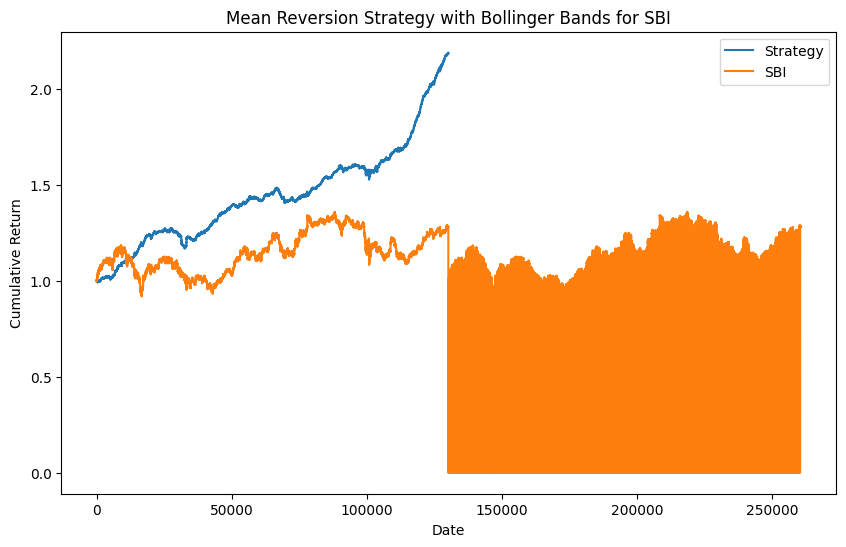

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load historical data (date, open, high, low, close, volume) into a DataFrame
# Replace 'your_data.csv' with the actual path to your data file
data = pd.read_csv('/content/drive/MyDrive/SBi_historical_data.csv')
#data['Datetime'] = pd.to_datetime(data['Datetime'])  # Convert to datetime
#data.set_index('Datetime', inplace=True)  # Set datetime as index

# Convert columns to numeric
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data.fillna(0, inplace=True)

# Calculate the 20-period simple moving average (SMA)
data['20SMA'] = data['Close'].rolling(window=20).mean()

# Calculate the upper and lower Bollinger Bands
data['20STD'] = data['Close'].rolling(window=20).std()
data['UpperBand'] = data['20SMA'] + 2 * data['20STD']
data['LowerBand'] = data['20SMA'] - 2 * data['20STD']

# Initialize signals
data['Signal'] = 0

# Generate signals based on Bollinger Bands
data.loc[data['Close'] < data['LowerBand'], 'Signal'] = 1  # Buy Signal
data.loc[data['Close'] > data['UpperBand'], 'Signal'] = -1  # Sell Signal

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('Mean Reversion Strategy with Bollinger Bands for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()


# ***3***-***RSI*** ***Mean*** ***Reversion***

In [ ]:
# The Relative Strength Index (RSI) Mean Reversion strategy is a popular trading
# approach that uses the RSI indicator to identify potential overbought and
# oversold conditions in the market. This strategy is based on the idea that after
# a period of strong price movement in one direction, the price is likely to
# reverse or correct in the opposite direction.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


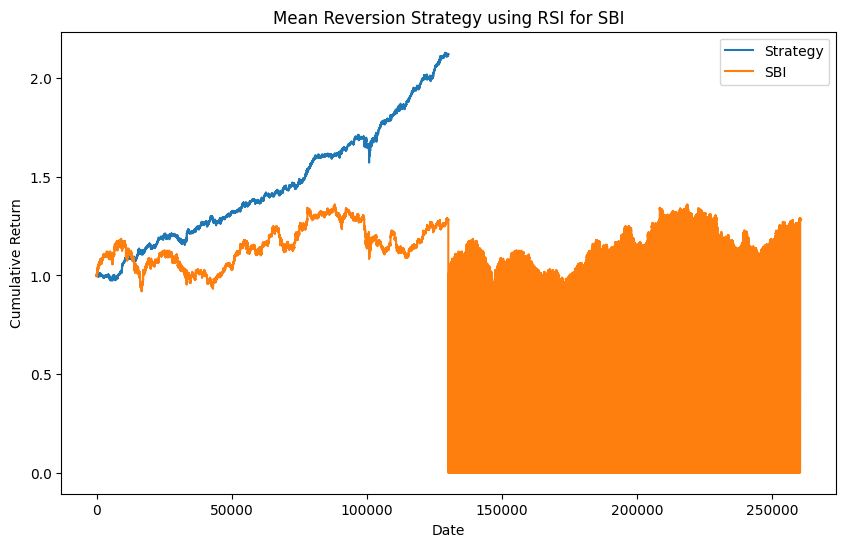

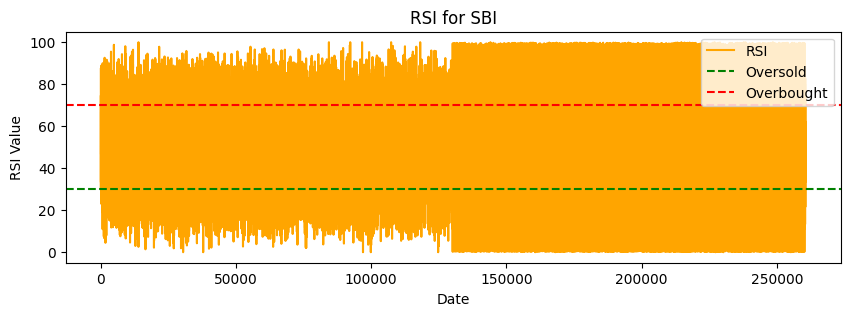

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Calculate daily price changes
data['PriceChange'] = data['Close'].diff()

# Calculate average gains and losses
data['Gain'] = np.where(data['PriceChange'] > 0, data['PriceChange'], 0)
data['Loss'] = np.where(data['PriceChange'] < 0, -data['PriceChange'], 0)

# Calculate average gains and average losses over a specified period (e.g., 14 days)
period = 14
data['AvgGain'] = data['Gain'].rolling(window=period).mean()
data['AvgLoss'] = data['Loss'].rolling(window=period).mean()

# Calculate relative strength (RS)
data['RS'] = data['AvgGain'] / data['AvgLoss']

# Calculate relative strength index (RSI)
data['RSI'] = 100 - (100 / (1 + data['RS']))

# Initialize signals
data['Signal'] = 0

# Generate signals based on Mean Reversion using RSI
oversold_threshold = 30
overbought_threshold = 70

data.loc[data['RSI'] < oversold_threshold, 'Signal'] = 1  # Buy Signal
data.loc[data['RSI'] > overbought_threshold, 'Signal'] = -1  # Sell Signal

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns and RSI
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('Mean Reversion Strategy using RSI for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Plot RSI
plt.figure(figsize=(10, 3))
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(y=oversold_threshold, color='green', linestyle='--', label='Oversold')
plt.axhline(y=overbought_threshold, color='red', linestyle='--', label='Overbought')
plt.legend()
plt.title('RSI for SBI')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.show()



# ***4***-***Moving*** ***Average*** ***Convergence*** ***Divergence*** (***MACD***) ***strategy***

In [ ]:
# The Moving Average Convergence Divergence (MACD) strategy is a widely used
# technical analysis approach that leverages the MACD indicator to identify
# potential trend reversals, momentum shifts, and entry and exit points in the
# financial markets. The MACD strategy is particularly popular among traders and
# investors for its versatility and ability to capture both trend-following and
# trend-reversal signals.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


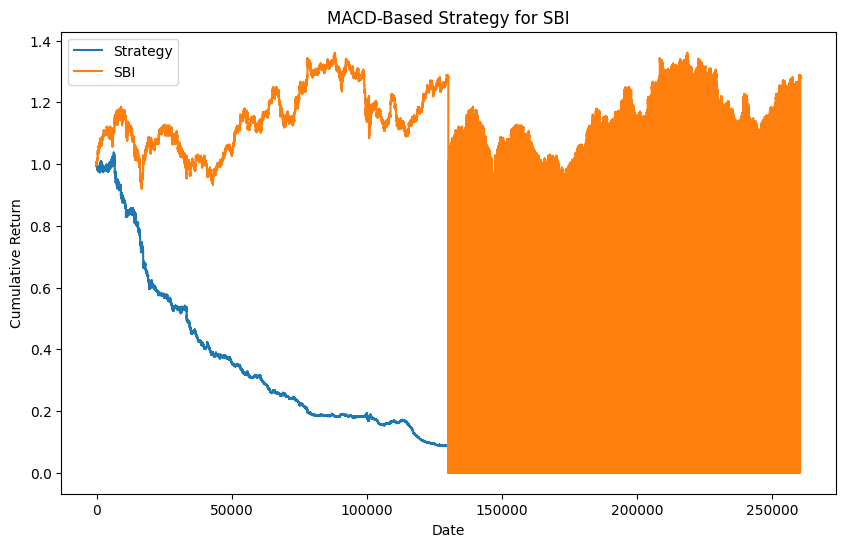

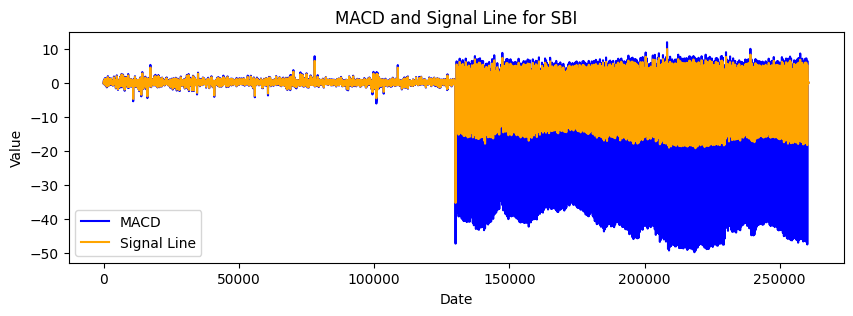

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate short-term and long-term exponential moving averages
data['12EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
data['26EMA'] = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD line
data['MACD'] = data['12EMA'] - data['26EMA']

# Calculate signal line (9-day EMA of MACD)
data['SignalLine'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Initialize signals
data['Signal'] = 0

# Generate signals based on MACD
data.loc[data['MACD'] > data['SignalLine'], 'Signal'] = 1  # Buy Signal
data.loc[data['MACD'] < data['SignalLine'], 'Signal'] = -1  # Sell Signal

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns, MACD, and Signal Line
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('MACD-Based Strategy for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

# Plot MACD and Signal Line
plt.figure(figsize=(10, 3))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['SignalLine'], label='Signal Line', color='orange')
plt.legend()
plt.title('MACD and Signal Line for SBI')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()



In [ ]:
#df= pd.read_csv(url)
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
#data.fillna(0, inplace=True)

# ***5***-***Relative*** ***Vigor*** ***Index*** (***RVI***) ***indicator***

In [ ]:
# The Relative Vigor Index (RVI) indicator strategy is a technical analysis
# approach that uses the RVI indicator to identify potential trend reversals and
# confirm the strength of a trend in the financial markets. The RVI is a momentum
# oscillator that measures the conviction of a trend by comparing the closing
# price to the trading range over a given period.

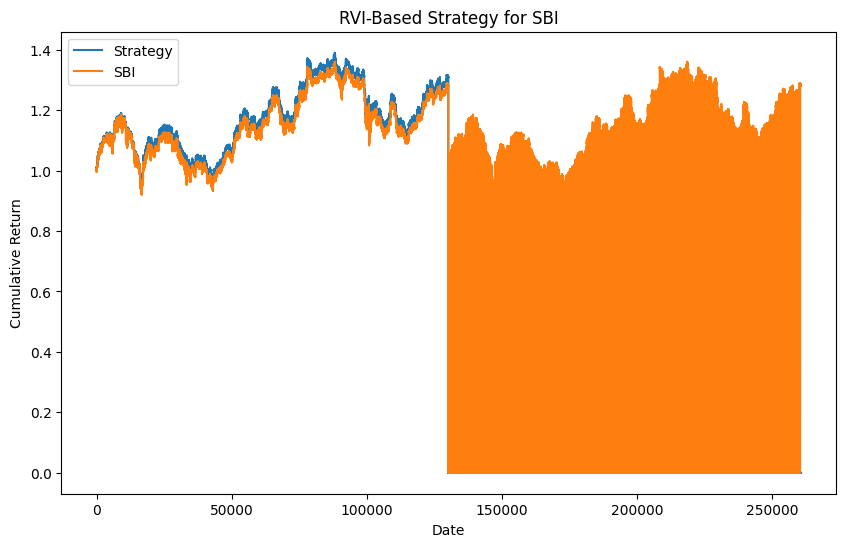

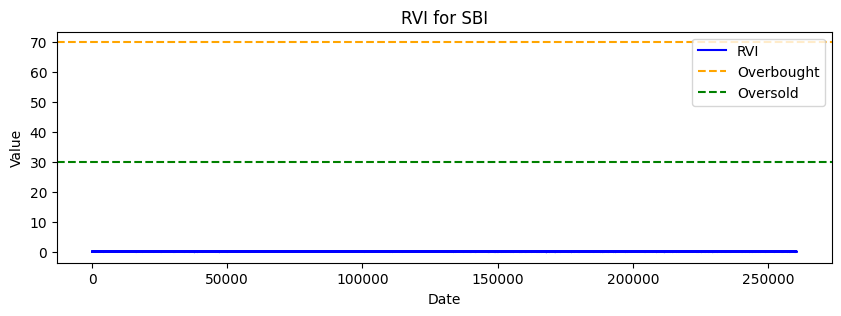

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
#data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
#data['High'] = pd.to_numeric(data['High'], errors='coerce')
#data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
#data.fillna(0, inplace=True)
# Calculate the typical price (TP)
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3

# Calculate the relative close price (RCP) as the close price relative to the open price
data['RCP'] = (data['Close'] - data['Open']) / (data['High'] - data['Low'])

# Calculate the simple moving average (SMA) of RCP over a specified period
window = 10
data['SMA_RCP'] = data['RCP'].rolling(window=window).mean()

# Calculate the simple moving average (SMA) of TP over a specified period
data['SMA_TP'] = data['TP'].rolling(window=window).mean()

# Calculate the RVI
data['RVI'] = (data['SMA_RCP'] / data['SMA_TP']) * 100

# Initialize signals
data['Signal'] = 0

# Generate signals based on RVI crossovers
overbought_threshold = 70
oversold_threshold = 30
data.loc[data['RVI'] > overbought_threshold, 'Signal'] = -1  # Sell Signal (Overbought)
data.loc[data['RVI'] < oversold_threshold, 'Signal'] = 1  # Buy Signal (Oversold)

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns and RVI
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('RVI-Based Strategy for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Plot RVI
plt.figure(figsize=(10, 3))
plt.plot(data['RVI'], label='RVI', color='blue')
plt.axhline(y=overbought_threshold, color='orange', linestyle='--', label='Overbought')
plt.axhline(y=oversold_threshold, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.title('RVI for SBI')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# ***6***-***Commodity*** ***Channel*** ***Index*** (***CCI***)

In [ ]:
# The Commodity Channel Index (CCI) strategy is a technical analysis approach that
# utilizes the CCI indicator to identify potential trend reversals, overbought and
# oversold conditions, and potential entry and exit points in the financial
# markets. The CCI is an oscillator that measures the deviation of an asset's
# price from its statistical mean, which helps traders identify extreme price
# movements.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


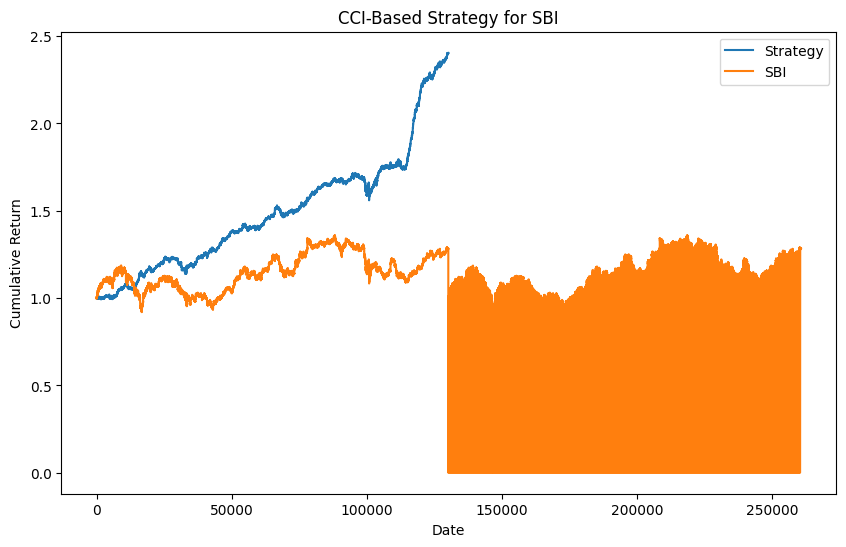

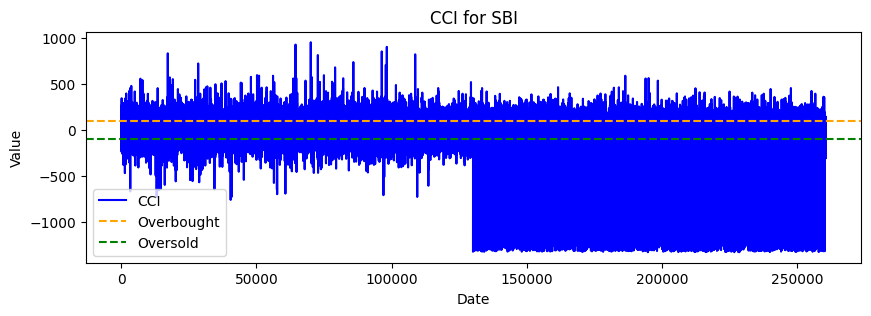

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data.fillna(0, inplace=True)

# Calculate the typical price (TP)
data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3

# Calculate the simple moving average (SMA) of TP over a specified period
window = 20
data['SMA_TP'] = data['TP'].rolling(window=window).mean()

# Calculate the mean absolute deviation (MAD) of TP from the SMA
data['MAD'] = np.abs(data['TP'] - data['SMA_TP']).rolling(window=window).mean()

# Calculate the Commodity Channel Index (CCI)
data['CCI'] = (data['TP'] - data['SMA_TP']) / (0.015 * data['MAD'])

# Initialize signals
data['Signal'] = 0

# Generate signals based on CCI
overbought_threshold = 100
oversold_threshold = -100
data.loc[data['CCI'] > overbought_threshold, 'Signal'] = -1  # Sell Signal (Overbought)
data.loc[data['CCI'] < oversold_threshold, 'Signal'] = 1  # Buy Signal (Oversold)

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns and CCI
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('CCI-Based Strategy for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Plot CCI
plt.figure(figsize=(10, 3))
plt.plot(data['CCI'], label='CCI', color='blue')
plt.axhline(y=overbought_threshold, color='orange', linestyle='--', label='Overbought')
plt.axhline(y=oversold_threshold, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.title('CCI for SBI')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# ***7***-***Average*** ***Directional*** ***Index*** (***ADX***) ***indicator***

In [ ]:
# The Average Directional Index (ADX) strategy is a technical analysis approach
# that utilizes the ADX indicator to gauge the strength of a trend and potentially
# identify trend reversals in the financial markets. The ADX is not used to
# determine the direction of a trend (whether it's bullish or bearish), but rather
# to measure the strength of the trend.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


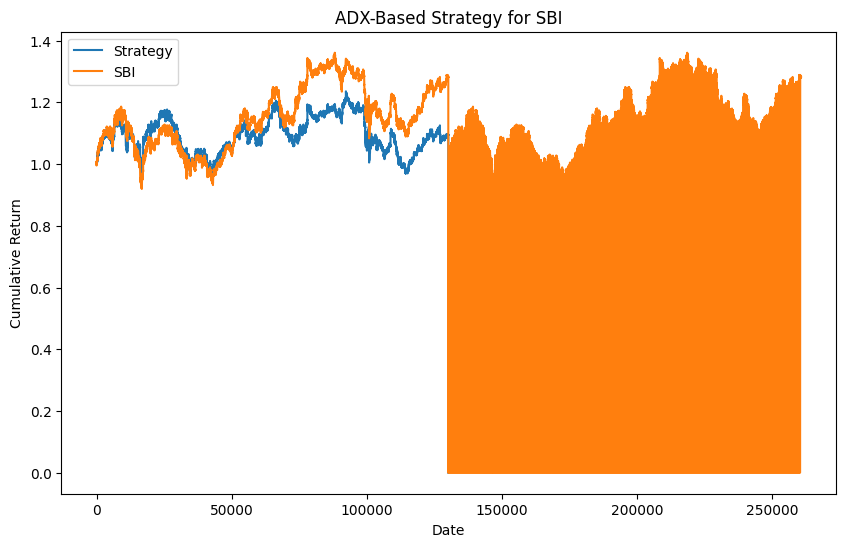

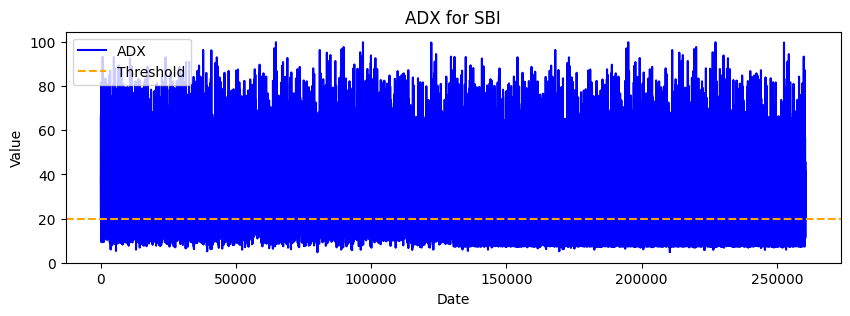

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data.fillna(0, inplace=True)
# Calculate the True Range (TR)
data['High_Low'] = data['High'] - data['Low']
data['High_PreviousClose'] = np.abs(data['High'] - data['Close'].shift(1))
data['Low_PreviousClose'] = np.abs(data['Low'] - data['Close'].shift(1))
data['TrueRange'] = data[['High_Low', 'High_PreviousClose', 'Low_PreviousClose']].max(axis=1)

# Calculate +DM and -DM
data['UpMove'] = data['High'] - data['High'].shift(1)
data['DownMove'] = data['Low'].shift(1) - data['Low']
data['PlusDM'] = np.where((data['UpMove'] > 0) & (data['UpMove'] > data['DownMove']), data['UpMove'], 0)
data['MinusDM'] = np.where((data['DownMove'] > 0) & (data['DownMove'] > data['UpMove']), data['DownMove'], 0)

# Calculate the smoothed Average True Range (ATR)
atr_period = 14
data['ATR'] = data['TrueRange'].rolling(window=atr_period).mean()

# Calculate +DI and -DI
plus_dm_smoothed = data['PlusDM'].rolling(window=atr_period).mean()
minus_dm_smoothed = data['MinusDM'].rolling(window=atr_period).mean()

data['PlusDI'] = (plus_dm_smoothed / data['ATR']) * 100
data['MinusDI'] = (minus_dm_smoothed / data['ATR']) * 100

# Calculate the Directional Index (DX)
data['DX'] = (np.abs(data['PlusDI'] - data['MinusDI']) / (data['PlusDI'] + data['MinusDI'])) * 100

# Calculate the Average Directional Index (ADX)
adx_period = 14
data['ADX'] = data['DX'].rolling(window=adx_period).mean()

# Initialize signals
data['Signal'] = 0

# Generate signals based on ADX
threshold = 20  # ADX threshold for trend strength
data.loc[data['ADX'] > threshold, 'Signal'] = 1  # Buy Signal

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns and ADX
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('ADX-Based Strategy for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Plot ADX
plt.figure(figsize=(10, 3))
plt.plot(data['ADX'], label='ADX', color='blue')
plt.axhline(y=threshold, color='orange', linestyle='--', label='Threshold')
plt.legend()
plt.title('ADX for SBI')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# ***8***-***On***-***Balance*** **Volume** (***OBV***) ***indicator***

In [ ]:
# The On-Balance Volume (OBV) strategy is a technical analysis approach that
# utilizes the OBV indicator to identify potential trend reversals, confirm
# trends, and anticipate price movements in the financial markets. The OBV
# indicator focuses on the relationship between volume and price changes to
# provide insights into market strength and direction.

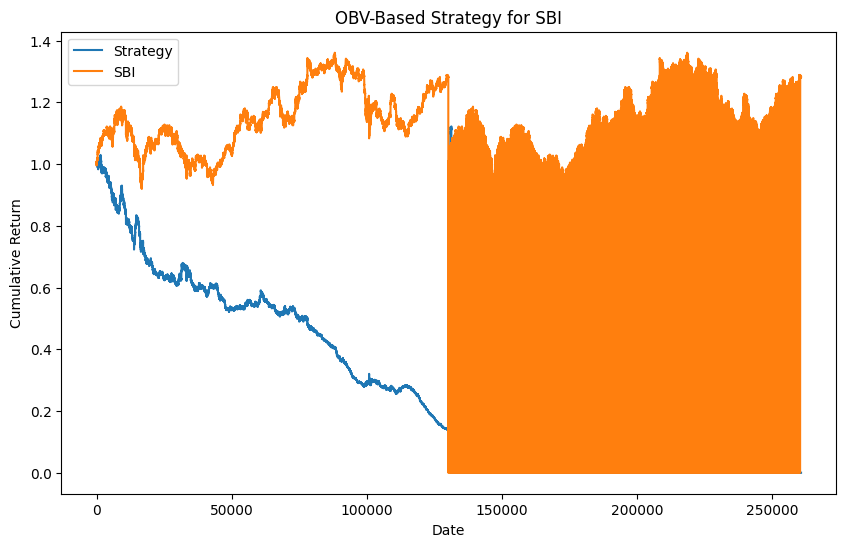

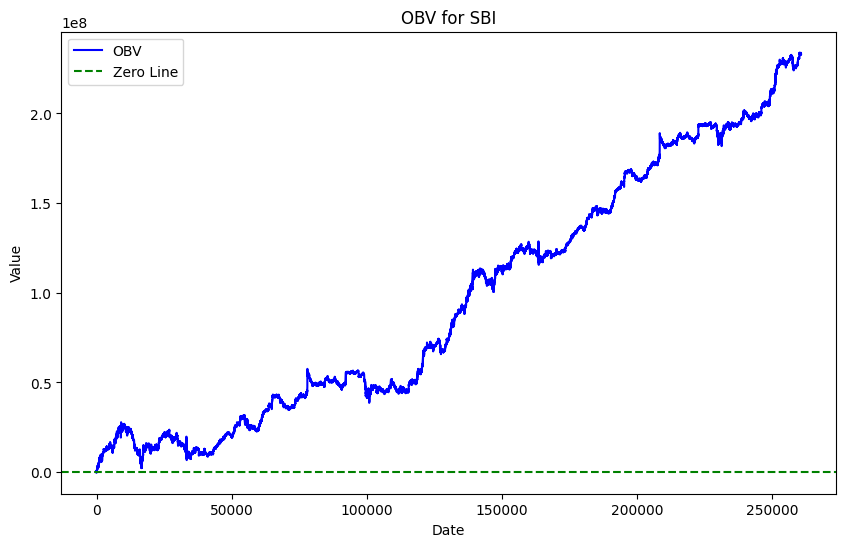

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Convert columns to numeric data types
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Calculate the On-Balance Volume (OBV)
data['OBV'] = np.where(data['Close'] > data['Close'].shift(1), data['Volume'],
                       np.where(data['Close'] < data['Close'].shift(1), -data['Volume'], 0)).cumsum()

# Initialize signals
data['Signal'] = 0

# Generate signals based on OBV crossovers
data.loc[data['OBV'] > data['OBV'].shift(1), 'Signal'] = 1  # Buy Signal (OBV increasing)
data.loc[data['OBV'] < data['OBV'].shift(1), 'Signal'] = -1  # Sell Signal (OBV decreasing)

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns and OBV
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('OBV-Based Strategy for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Plot OBV
plt.figure(figsize=(10, 6))
plt.plot(data['OBV'], label='OBV', color='blue')
plt.axhline(y=0, color='green', linestyle='--', label='Zero Line')
plt.legend()
plt.title('OBV for SBI')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


# ***9***-***Average*** ***True*** ***Range*** (***ATR***) ***indicator***

In [ ]:
# The Average True Range (ATR) strategy is a technical analysis approach that uses
# the ATR indicator to measure volatility, identify potential trend changes, and
# set appropriate stop-loss levels in the financial markets. The ATR indicator
# provides insights into the range of price movements, taking into account gaps
# and limit moves, which makes it particularly useful for assessing market
# volatility.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


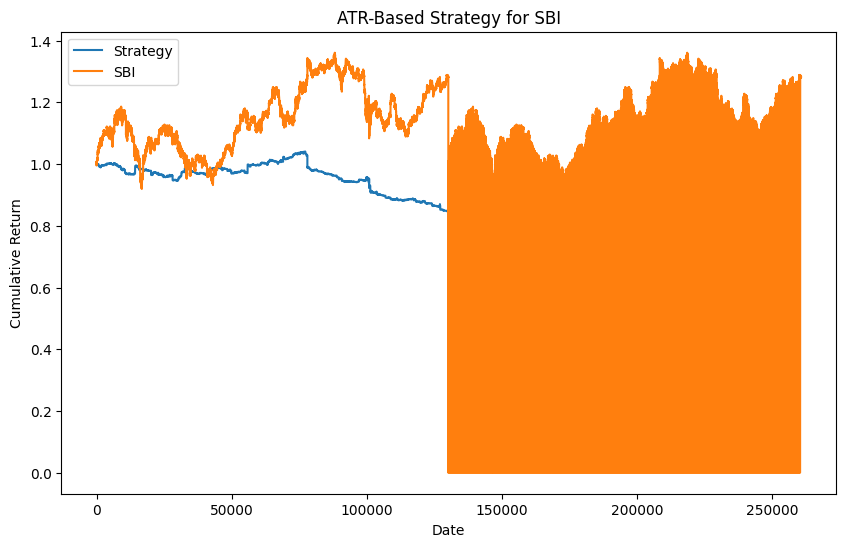

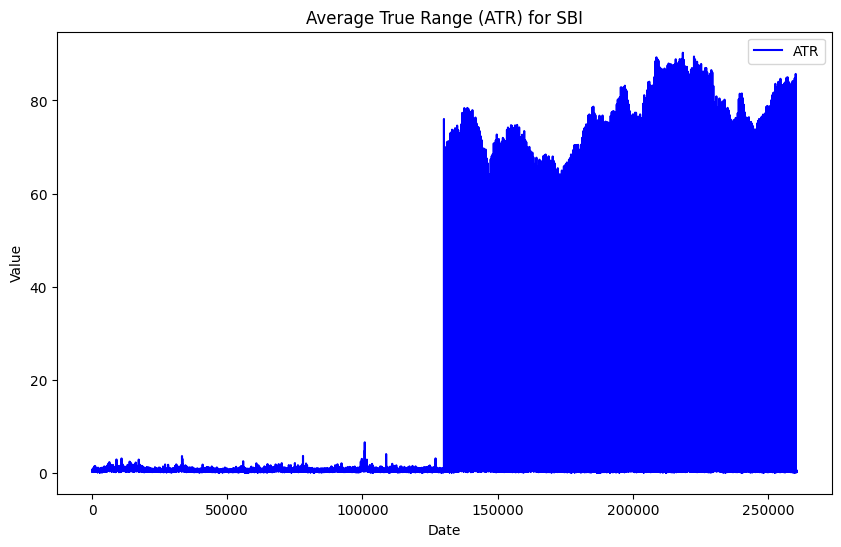

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data.fillna(0, inplace=True)

# Calculate the True Range (TR)
data['TR'] = np.maximum(data['High'] - data['Low'],
                        np.maximum(np.abs(data['High'] - data['Close'].shift(1)),
                                   np.abs(data['Low'] - data['Close'].shift(1))))

# Calculate the 14-day Average True Range (ATR)
data['ATR'] = data['TR'].rolling(window=14).mean()

# Initialize signals
data['Signal'] = 0

# Set ATR multiplier
atr_multiplier = 2.0

# Generate signals based on ATR
data.loc[data['Close'] > data['Close'].shift(1) + atr_multiplier * data['ATR'], 'Signal'] = 1  # Buy Signal
data.loc[data['Close'] < data['Close'].shift(1) - atr_multiplier * data['ATR'], 'Signal'] = -1  # Sell Signal

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns and ATR
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('ATR-Based Strategy for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Plot ATR
plt.figure(figsize=(10, 6))
plt.plot(data['ATR'], label='ATR', color='blue')
plt.legend()
plt.title('Average True Range (ATR) for SBI')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


# ***10***-***Stochastic*** ***Oscillator***

In [ ]:
# The Stochastic Oscillator strategy is a popular technical analysis approach used
# to identify potential overbought and oversold conditions, as well as potential
# trend reversals, in the financial markets. The Stochastic Oscillator measures
# the relationship between an asset's closing price and its price range over a
# certain period, helping traders assess momentum and potential turning points.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data.fillna(0, inplace=True)

# Calculate the 14-day Stochastic Oscillator
window = 14

# Calculate the lowest low and highest high over the window period
data['LowestLow'] = data['Low'].rolling(window=window, min_periods=1).min()
data['HighestHigh'] = data['High'].rolling(window=window, min_periods=1).max()

# Calculate the %K Stochastic Oscillator
data['%K'] = ((data['Close'] - data['LowestLow']) / (data['HighestHigh'] - data['LowestLow'])) * 100

# Calculate the %D Stochastic Oscillator (3-day simple moving average of %K)
data['%D'] = data['%K'].rolling(window=3).mean()

# Initialize signals
data['Signal'] = 0

# Set threshold levels for %K
overbought_threshold = 80
oversold_threshold = 20

# Generate signals based on %K levels
data.loc[data['%K'] > overbought_threshold, 'Signal'] = -1  # Sell Signal (Overbought)
data.loc[data['%K'] < oversold_threshold, 'Signal'] = 1  # Buy Signal (Oversold)

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns and Stochastic Oscillator
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('Stochastic Oscillator-Based Strategy for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Plot %K and %D Stochastic Oscillator
plt.figure(figsize=(10, 6))
plt.plot(data['%K'], label='%K', color='blue')
plt.plot(data['%D'], label='%D', color='orange')
plt.axhline(y=overbought_threshold, color='red', linestyle='--', label='Overbought')
plt.axhline(y=oversold_threshold, color='green', linestyle='--', label='Oversold')
plt.legend()
plt.title('Stochastic Oscillator (%K and %D) for SBI')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


NameError: ignored

# ***11***-***Moving*** ***Average*** ***Ribbon***

In [ ]:
# The Moving Average Ribbon strategy is a technical analysis approach that
# utilizes multiple moving averages of varying timeframes to identify trends,
# confirm trend strength, and generate entry and exit signals in the financial
# markets. The strategy involves plotting multiple moving averages on a chart to
# create a "ribbon" of lines that represent different trends over different time
# periods.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


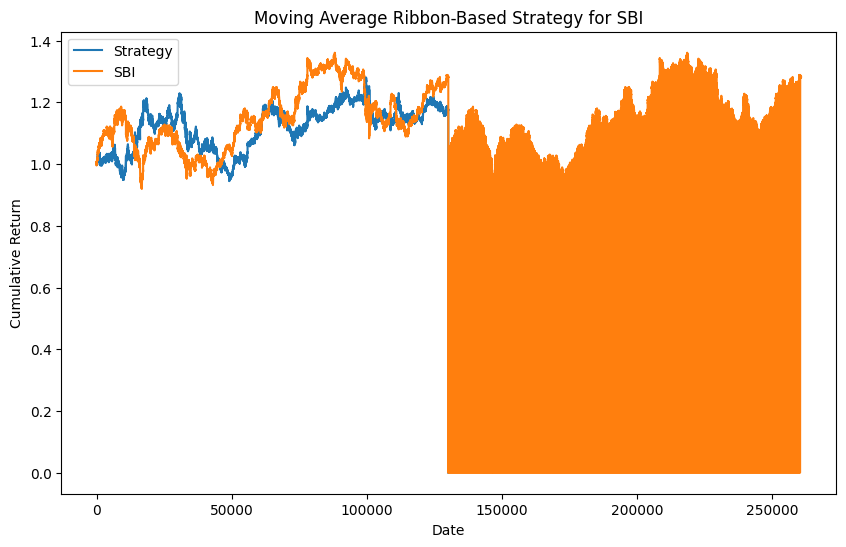

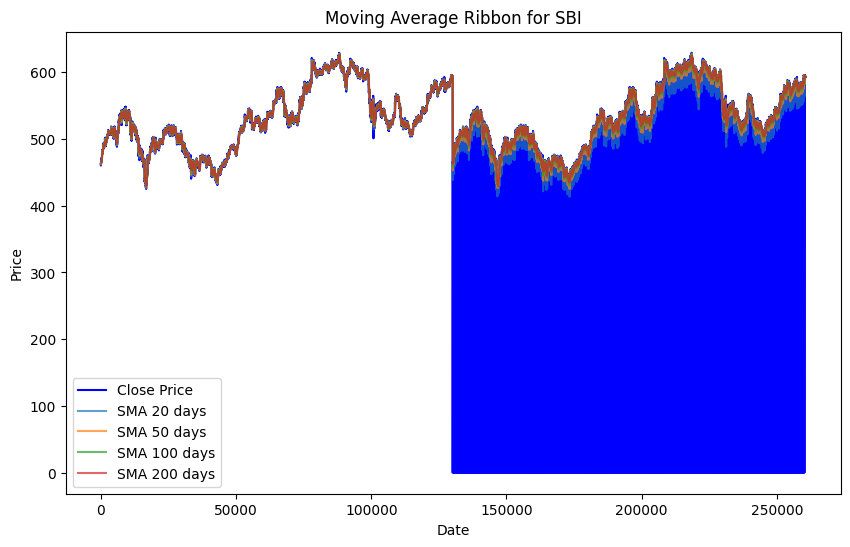

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data.fillna(0, inplace=True)

# Define a list of moving average periods
moving_average_periods = [20, 50, 100, 200]

# Calculate moving averages for each period
for period in moving_average_periods:
    data[f'SMA_{period}'] = data['Close'].rolling(window=period).mean()

# Initialize signals
data['Signal'] = 0

# Generate signals based on moving average crossovers
for i in range(len(moving_average_periods) - 1):
    short_period = moving_average_periods[i]
    long_period = moving_average_periods[i + 1]

    data.loc[data[f'SMA_{short_period}'] > data[f'SMA_{long_period}'], 'Signal'] = 1  # Buy Signal (Cross-over)
    data.loc[data[f'SMA_{short_period}'] < data[f'SMA_{long_period}'], 'Signal'] = -1  # Sell Signal (Cross-under)

# Calculate daily returns
data['DailyReturn'] = data['Close'].pct_change()

# Calculate strategy returns
data['StrategyReturn'] = data['Signal'].shift(1) * data['DailyReturn']

# Calculate cumulative returns
data['CumulativeReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plot cumulative returns and Moving Average Ribbon
plt.figure(figsize=(10, 6))
plt.plot(data['CumulativeReturn'], label='Strategy')
plt.plot(data['Close'] / data['Close'].iloc[0], label='SBI')
plt.legend()
plt.title('Moving Average Ribbon-Based Strategy for SBI')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Plot Moving Average Ribbon
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
for period in moving_average_periods:
    plt.plot(data[f'SMA_{period}'], label=f'SMA {period} days', alpha=0.7)
plt.legend()
plt.title('Moving Average Ribbon for SBI')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
